In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df1=pd.read_csv("HDdata.csv")
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
df2=pd.read_csv("labels.csv")
df2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
# Merging two dataframes
newdf=pd.merge(df1,df2,on='patient_id')

In [5]:
newdf.shape

(180, 15)

In [6]:
newdf.drop('patient_id',axis=1,inplace=True)

In [7]:
#Rename of column's name
newdf.rename(columns={'slope_of_peak_exercise_st_segment':'slope',
                        'resting_blood_pressure':'rbp','chest_pain_type':'cp',
                        'num_major_vessels':'ca','fasting_blood_sugar_gt_120_mg_per_dl':'fbs',
                        'resting_ekg_results':'restecg','serum_cholesterol_mg_per_dl':'chol',
                        'oldpeak_eq_st_depression':'oldpeak','max_heart_rate_achieved':'thalach',
                        'exercise_induced_angina':'exang','heart_disease_present':'target'},inplace=True)

In [8]:
newdf.head()

,slope,thal,rbp,cp,ca,fbs,restecg,chol,oldpeak,sex,age,thalach,exang,target
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [9]:
newdf.shape

(180, 14)

In [10]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
slope      180 non-null int64
thal       180 non-null object
rbp        180 non-null int64
cp         180 non-null int64
ca         180 non-null int64
fbs        180 non-null int64
restecg    180 non-null int64
chol       180 non-null int64
oldpeak    180 non-null float64
sex        180 non-null int64
age        180 non-null int64
thalach    180 non-null int64
exang      180 non-null int64
target     180 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 21.1+ KB


In [11]:
#check for missing values
newdf.isnull().sum()

slope      0
thal       0
rbp        0
cp         0
ca         0
fbs        0
restecg    0
chol       0
oldpeak    0
sex        0
age        0
thalach    0
exang      0
target     0
dtype: int64

In [12]:
newdf.describe()

,slope,rbp,cp,ca,fbs,restecg,chol,oldpeak,sex,age,thalach,exang,target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [13]:
# DATA VISUALISATION
newdf.corr()

,slope,rbp,cp,ca,fbs,restecg,chol,oldpeak,sex,age,thalach,exang,target
slope,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
rbp,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
cp,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
ca,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fbs,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
restecg,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
chol,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


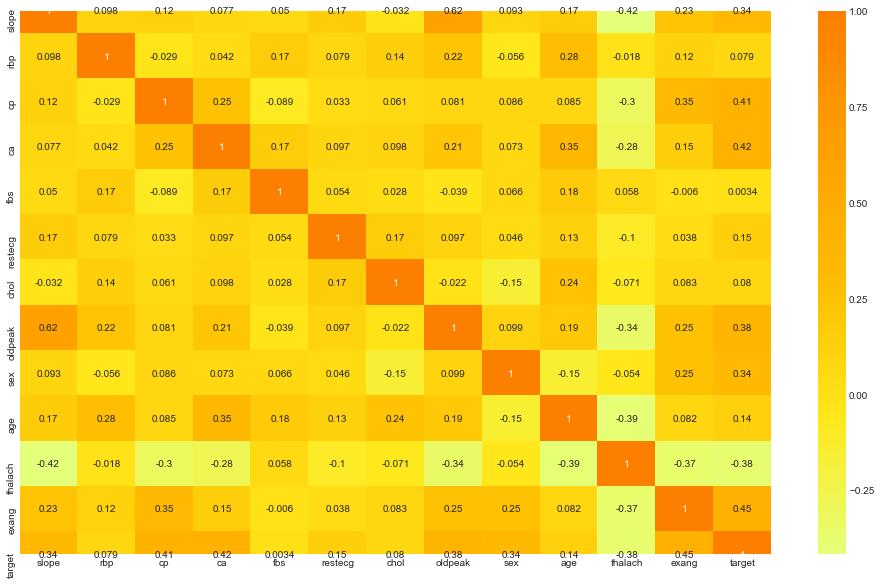

In [14]:
# visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr(), annot=True, cmap = 'Wistia')
plt.show()

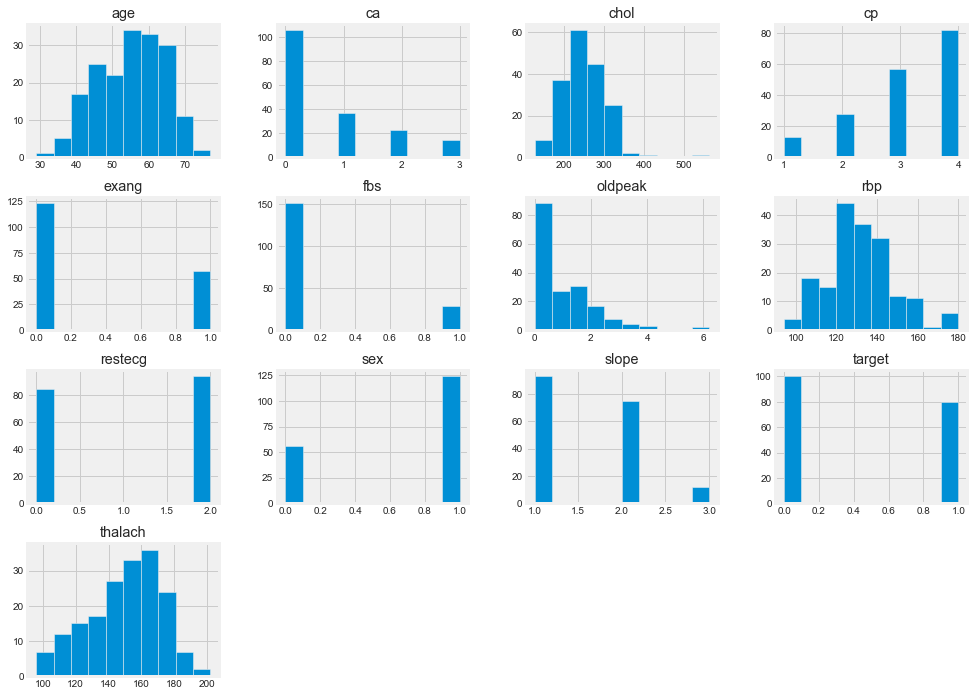

In [15]:
# plot histograms for each variable
newdf.hist(figsize = (15, 12))
plt.show()

<Figure size 1080x576 with 0 Axes>

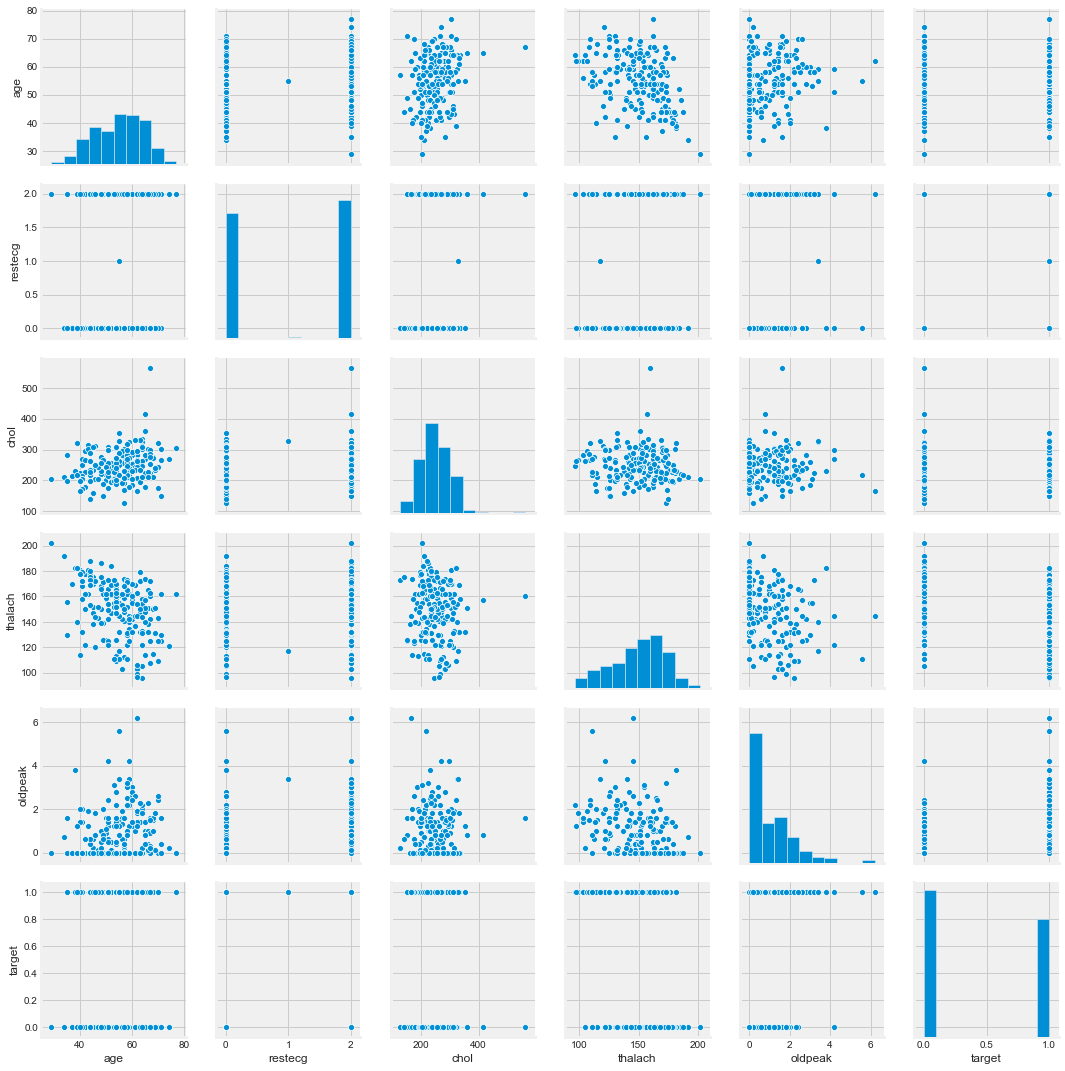

In [16]:
plt.figure(figsize=(15,8))
num = ['age', 'restecg', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(newdf[num], kind='scatter', diag_kind='hist')
plt.show()

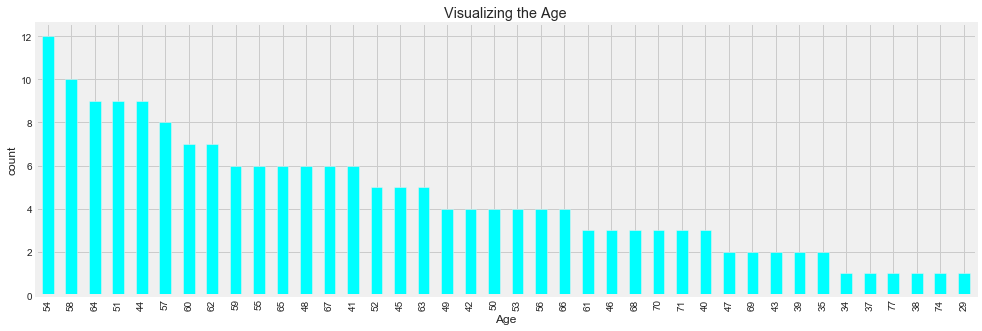

In [17]:
# visualising the Age in the dataset
plt.subplots(figsize=(15,5))
newdf['age'].value_counts(normalize = True)
newdf['age'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Visualizing the Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

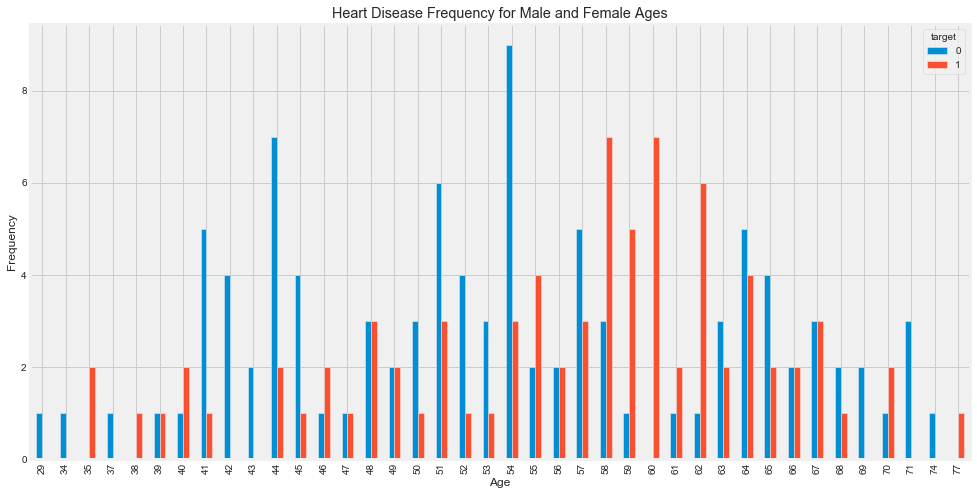

In [18]:
pd.crosstab(newdf.age,newdf.target).plot(kind="bar",figsize=(15,8))
plt.title('Heart Disease Frequency for Male and Female Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

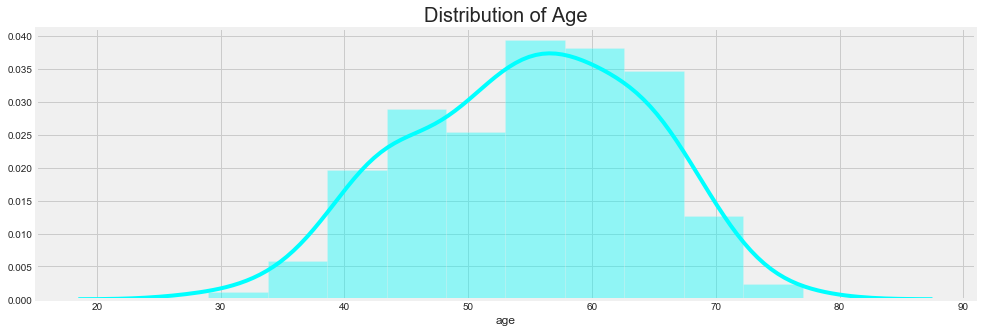

In [19]:
plt.subplots(figsize=(15,5))
sns.distplot(newdf['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

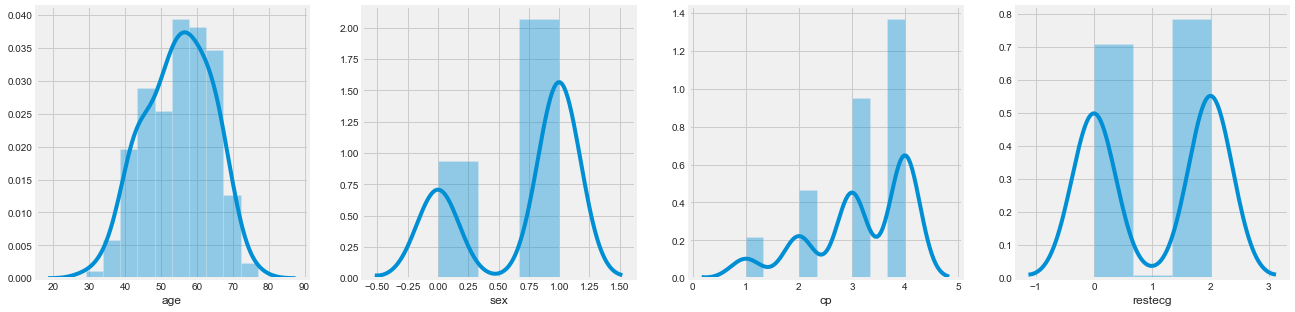

In [20]:
plt.subplots(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.distplot(newdf['age'])

plt.subplot(1, 4, 2)
sns.distplot(newdf['sex'])

plt.subplot(1, 4, 3)
sns.distplot(newdf['cp'])

plt.subplot(1, 4, 4)
sns.distplot(newdf['restecg'])

plt.show()

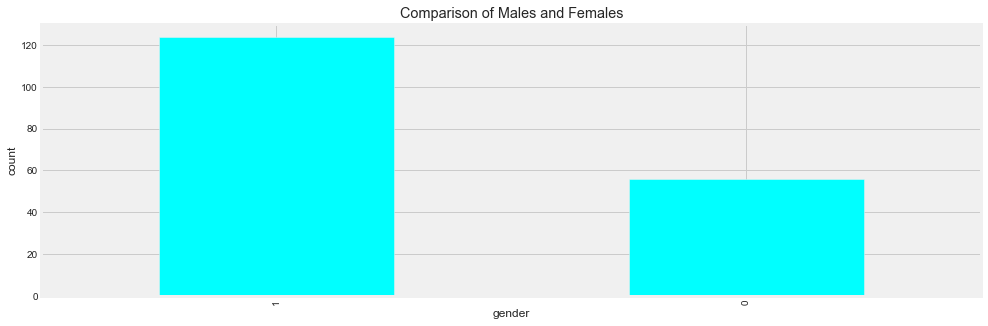

In [21]:
# visualising the number of male and female in the dataset
plt.subplots(figsize=(15,5))
newdf['sex'].value_counts(normalize = True)
newdf['sex'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()


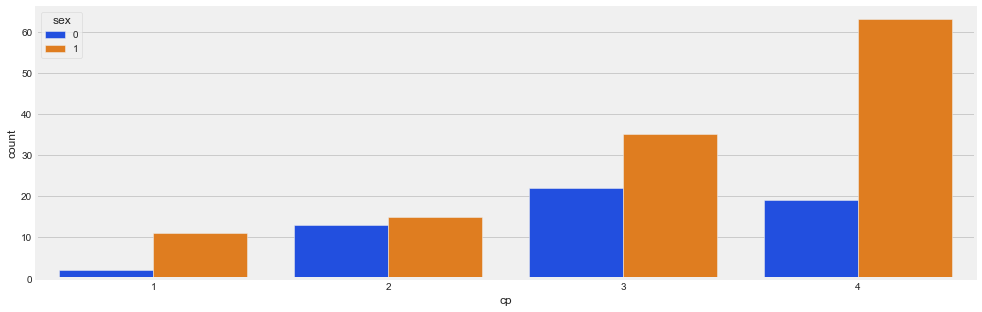

In [22]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'cp', data = newdf,  hue = 'sex', palette = 'bright')
plt.show()

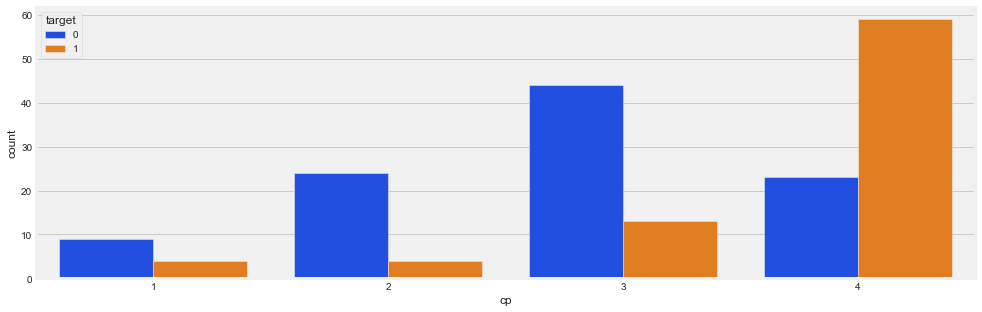

In [23]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'cp', data = newdf,  hue = 'target', palette = 'bright')
plt.show()

In [24]:
newdf['age'].describe()

count    180.000000
mean      54.811111
std        9.334737
min       29.000000
25%       48.000000
50%       55.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

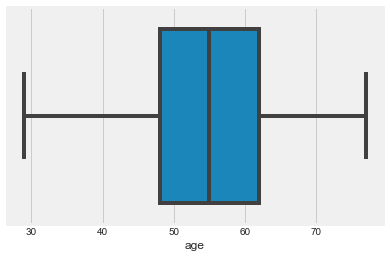

In [25]:
sns.boxplot(x=newdf["age"])
plt.show()

In [27]:
newdf['restecg'].describe()

count    180.000000
mean       1.050000
std        0.998742
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: restecg, dtype: float64

In [ ]:
sns.boxplot(x=newdf["restecg"])
plt.show()

In [29]:
newdf['chol'].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: chol, dtype: float64

In [ ]:
sns.boxplot(x=newdf["chol"])
plt.show()

In [30]:
newdf['thalach'].describe()

count    180.000000
mean     149.483333
std       22.063513
min       96.000000
25%      132.000000
50%      152.000000
75%      166.250000
max      202.000000
Name: thalach, dtype: float64

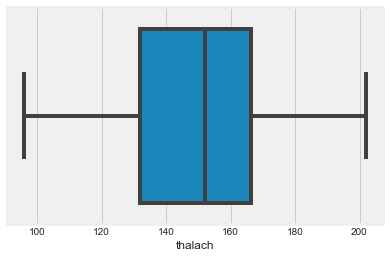

In [31]:
sns.boxplot(x=newdf["thalach"])
plt.show()

In [32]:
newdf['oldpeak'].describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

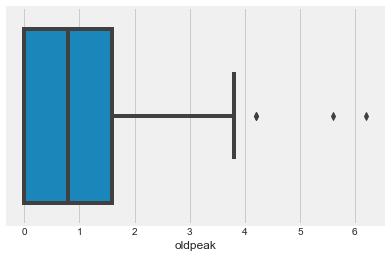

In [33]:
sns.boxplot(x=newdf["oldpeak"])
plt.show()

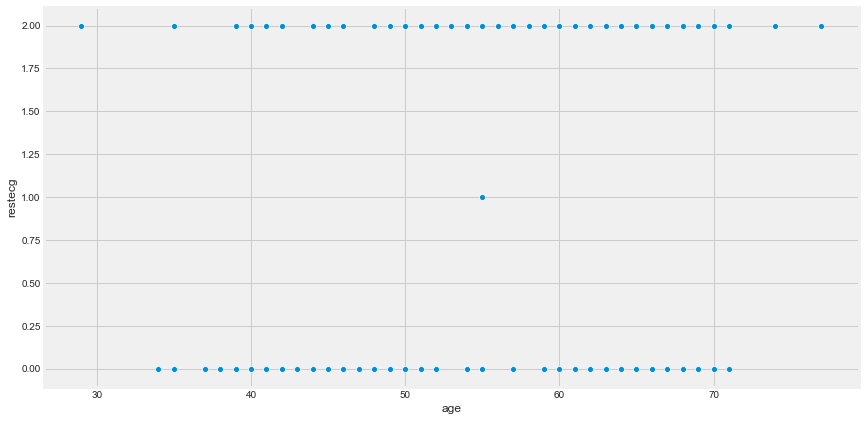

In [34]:
f, ax = plt.subplots(figsize=(13, 7))
ax = sns.scatterplot(x="age", y="restecg", data=newdf)
plt.show()

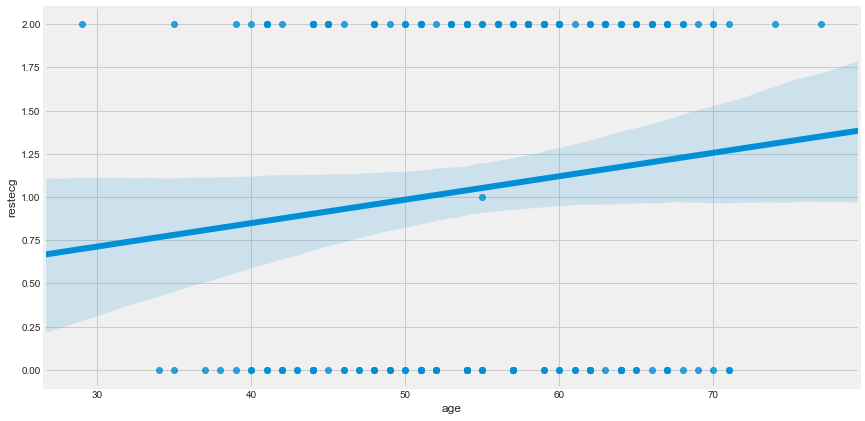

In [35]:
f, ax = plt.subplots(figsize=(13, 7))
ax = sns.regplot(x="age", y="restecg", data=newdf)
plt.show()

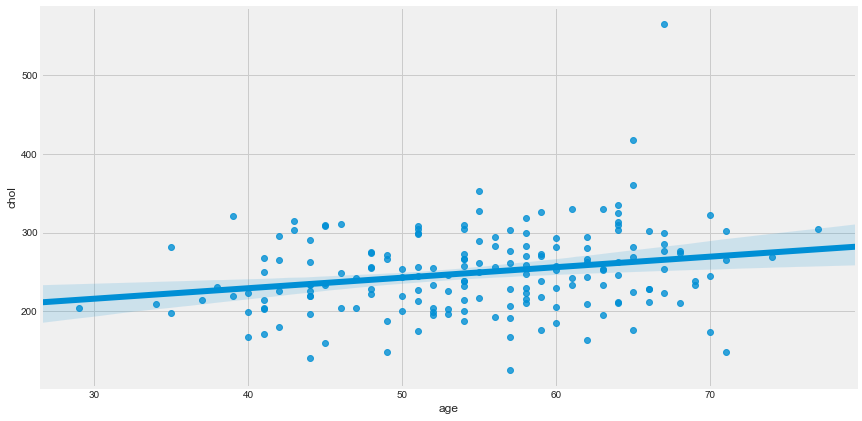

In [36]:
f, ax = plt.subplots(figsize=(13, 7))
ax = sns.regplot(x="age", y="chol", data=newdf)
plt.show()

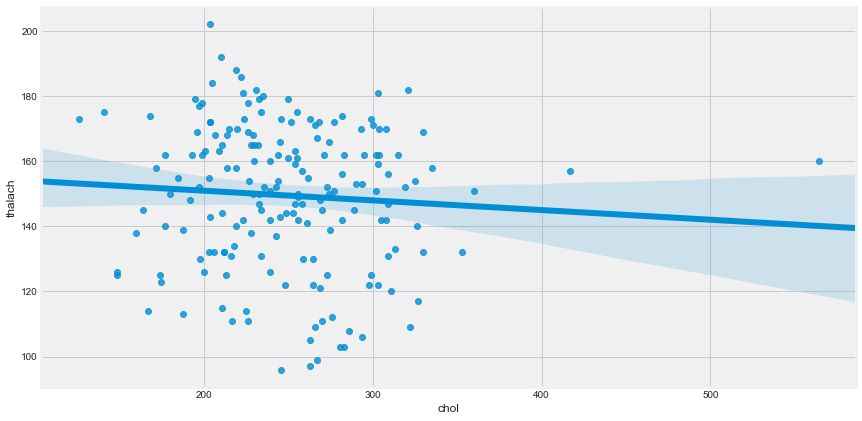

In [37]:
f, ax = plt.subplots(figsize=(13, 7))
ax = sns.regplot(x="chol", y="thalach", data=newdf)
plt.show()  

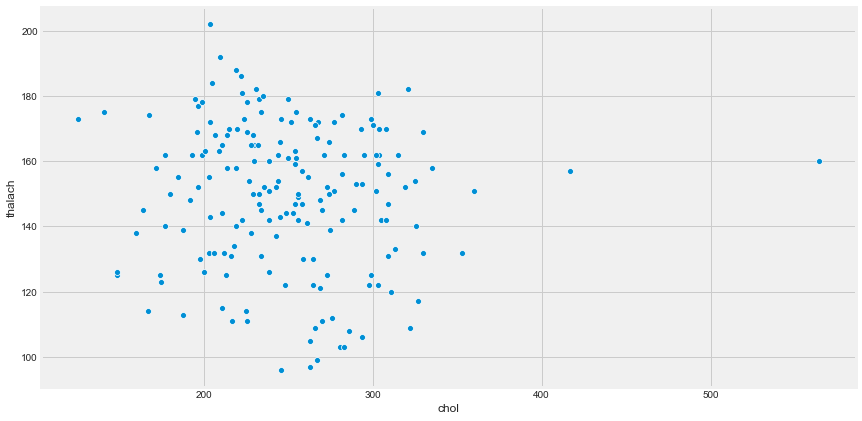

In [38]:
f, ax = plt.subplots(figsize=(13, 7))
ax = sns.scatterplot(x="chol", y = "thalach", data=newdf)
plt.show()

In [39]:
newdf.dtypes

slope        int64
thal        object
rbp          int64
cp           int64
ca           int64
fbs          int64
restecg      int64
chol         int64
oldpeak    float64
sex          int64
age          int64
thalach      int64
exang        int64
target       int64
dtype: object

In [40]:
newdf = pd.get_dummies(newdf, drop_first=True)

In [41]:
newdf.head()

,slope,rbp,cp,ca,fbs,restecg,chol,oldpeak,sex,age,thalach,exang,target,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [49]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'restecg', 'chol', 'thalach', 'oldpeak']
newdf[col_to_scale] = s_sc.fit_transform(newdf[col_to_scale])

In [50]:
newdf.head()

,slope,rbp,cp,ca,fbs,restecg,chol,oldpeak,sex,age,thalach,exang,target,thal_normal,thal_reversible_defect
0,1,128,2,0,0,0.953850,1.118269,-0.903207,1,-1.053964,0.932485,0,0,1,0
1,2,110,3,0,0,-1.054255,-0.669778,0.527616,0,-0.087134,0.387084,0,0,1,0
2,1,125,4,3,0,0.953850,1.042182,-0.903207,1,2.383654,0.568884,1,1,1,0
3,1,152,4,0,0,-1.054255,-0.498582,-0.903207,1,-1.591092,1.432436,0,1,0,1
4,3,178,1,0,0,0.953850,0.395442,2.852703,1,0.449994,-0.203768,0,0,0,1


In [115]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = newdf.drop('target', axis=1)
y = newdf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# MODELLING:
## LOGISTIC REGRESSION

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [118]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 81.48 %


In [101]:
## NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

In [103]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 85.19 %


In [104]:
## SVM
from sklearn import svm
sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

In [105]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.48 %


In [114]:
## DECISION TREE
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x =x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [107]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.78 %


In [108]:
## RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [109]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.89 %


In [111]:
## XGBOOST
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [113]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.33 %
